# Step #1 Load the Data

In [1]:
# A tutorial for this file is available at www.relataly.com

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import XGBClassifier
import plotly.express as px
import seaborn as sns
sns.set_style('white', { 'axes.spines.right': False, 'axes.spines.top': False})

# The Data is part of the Kaggle Competition: https://www.kaggle.com/c/sf-crime/data
df_base = pd.read_csv("data/crime/sf-crime/train.csv")

print(df_base.describe())
df_base.head()

                   X              Y
count  878049.000000  878049.000000
mean     -122.422616      37.771020
std         0.030354       0.456893
min      -122.513642      37.707879
25%      -122.432952      37.752427
50%      -122.416420      37.775421
75%      -122.406959      37.784369
max      -120.500000      90.000000


Dates        Category                      Descript  \
0  2015-05-13 23:53:00        WARRANTS                WARRANT ARREST   
1  2015-05-13 23:53:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
2  2015-05-13 23:33:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
3  2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   
4  2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   

   DayOfWeek PdDistrict      Resolution                    Address  \
0  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
1  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
2  Wednesday   NORTHERN  ARREST, BOOKED  VANNESS AV / GREENWICH ST   
3  Wednesday   NORTHERN            NONE   1500 Block of LOMBARD ST   
4  Wednesday       PARK            NONE  100 Block of BRODERICK ST   

            X          Y  
0 -122.425892  37.774599  
1 -122.425892  37.774599  
2 -122.424363  37.800414  
3 -122.426995  37.800873  
4 -122.438738  37.771541

# Step #2 Explore the Data

[Text(0, 0, 'LARCENY/THEFT'),
 Text(1, 0, 'OTHER OFFENSES'),
 Text(2, 0, 'NON-CRIMINAL'),
 Text(3, 0, 'ASSAULT'),
 Text(4, 0, 'DRUG/NARCOTIC'),
 Text(5, 0, 'VEHICLE THEFT'),
 Text(6, 0, 'VANDALISM'),
 Text(7, 0, 'WARRANTS'),
 Text(8, 0, 'BURGLARY'),
 Text(9, 0, 'SUSPICIOUS OCC'),
 Text(10, 0, 'MISSING PERSON'),
 Text(11, 0, 'ROBBERY'),
 Text(12, 0, 'FRAUD'),
 Text(13, 0, 'FORGERY/COUNTERFEITING'),
 Text(14, 0, 'SECONDARY CODES'),
 Text(15, 0, 'WEAPON LAWS'),
 Text(16, 0, 'PROSTITUTION'),
 Text(17, 0, 'TRESPASS'),
 Text(18, 0, 'STOLEN PROPERTY'),
 Text(19, 0, 'SEX OFFENSES FORCIBLE'),
 Text(20, 0, 'DISORDERLY CONDUCT'),
 Text(21, 0, 'DRUNKENNESS'),
 Text(22, 0, 'RECOVERED VEHICLE'),
 Text(23, 0, 'KIDNAPPING'),
 Text(24, 0, 'DRIVING UNDER THE INFLUENCE'),
 Text(25, 0, 'RUNAWAY'),
 Text(26, 0, 'LIQUOR LAWS'),
 Text(27, 0, 'ARSON'),
 Text(28, 0, 'LOITERING'),
 Text(29, 0, 'EMBEZZLEMENT'),
 Text(30, 0, 'SUICIDE'),
 Text(31, 0, 'FAMILY OFFENSES'),
 Text(32, 0, 'BAD CHECKS'),
 Text(33, 0, 'BR

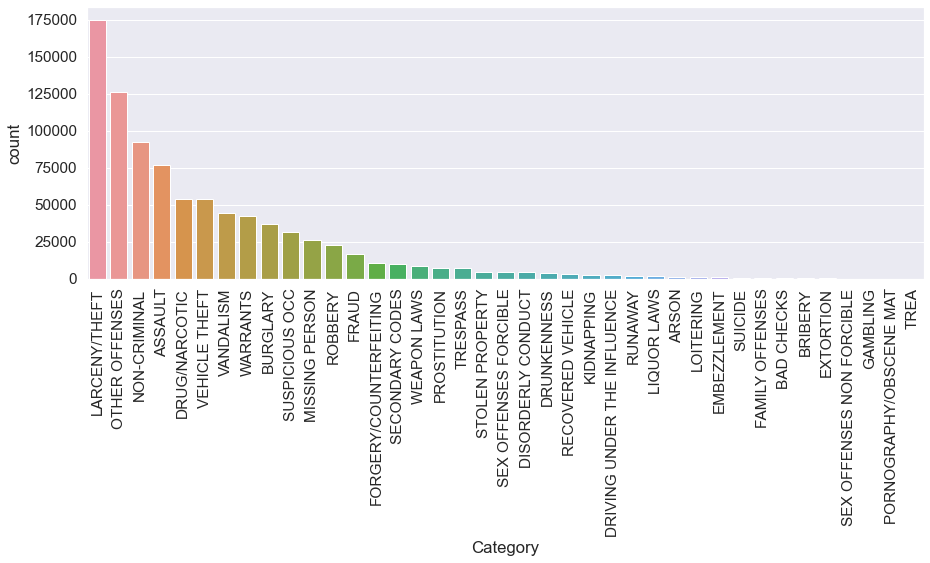

In [27]:
# print the value counts of the categories
plt.figure(figsize=(15,5))
ax = sns.countplot(x = df_base['Category'], orient='v', order = df_base['Category'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

<ipython-input-28-0efd16805b43>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)


[Text(0.0, 0, ''),
 Text(25000.0, 0, ''),
 Text(50000.0, 0, ''),
 Text(75000.0, 0, ''),
 Text(100000.0, 0, ''),
 Text(125000.0, 0, ''),
 Text(150000.0, 0, '')]

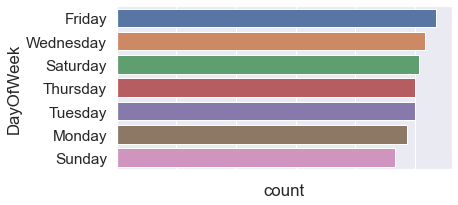

In [28]:
# Print Crime Counts per Weekday
plt.figure(figsize=(6,3))
ax = sns.countplot(y = df_base['DayOfWeek'], orient='h', order = df_base['DayOfWeek'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

<Figure size 1152x720 with 0 Axes>

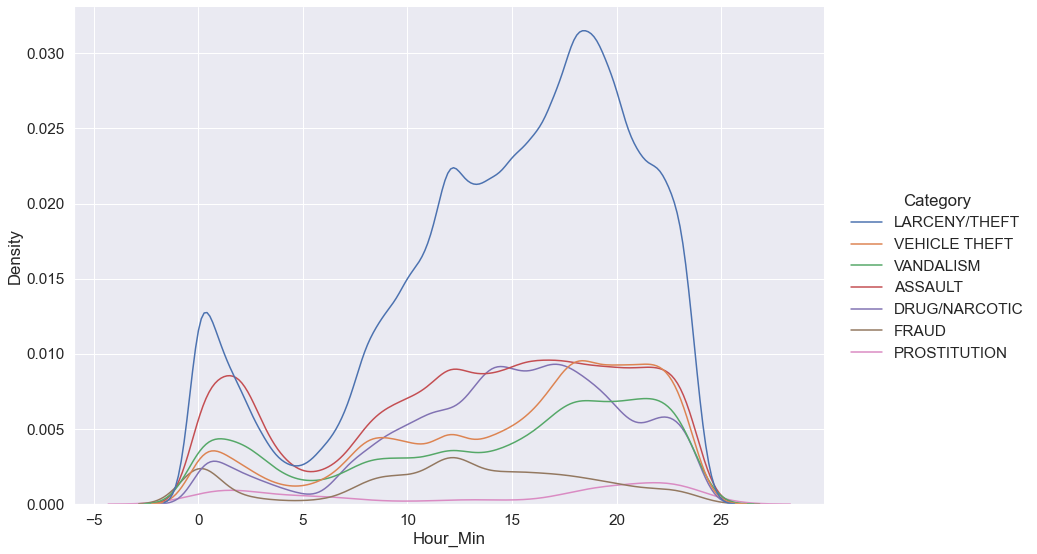

In [35]:
# Convert the time to minutes
df_base['Hour_Min'] = pd.to_datetime(df_base['Dates']).dt.hour  + pd.to_datetime(df_base['Dates']).dt.minute / 60

# Print Crime Counts per Time and Category
df_base_filtered = df_base[df_base['Category'].isin([
    'PROSTITUTION', 
    'VEHICLE THEFT', 
    'DRUG/NARCOTIC', 
    'WARRENTS', 
    'BURGLERY', 
    'FRAUD', 
    'ASSAULT',
    'LARCENY/THEFT',
    'VANDALISM'])]

plt.figure(figsize=(16,10))
ax = sns.displot(x = 'Hour_Min', hue="Category", data = df_base_filtered, kind="kde", height=6, aspect=2)

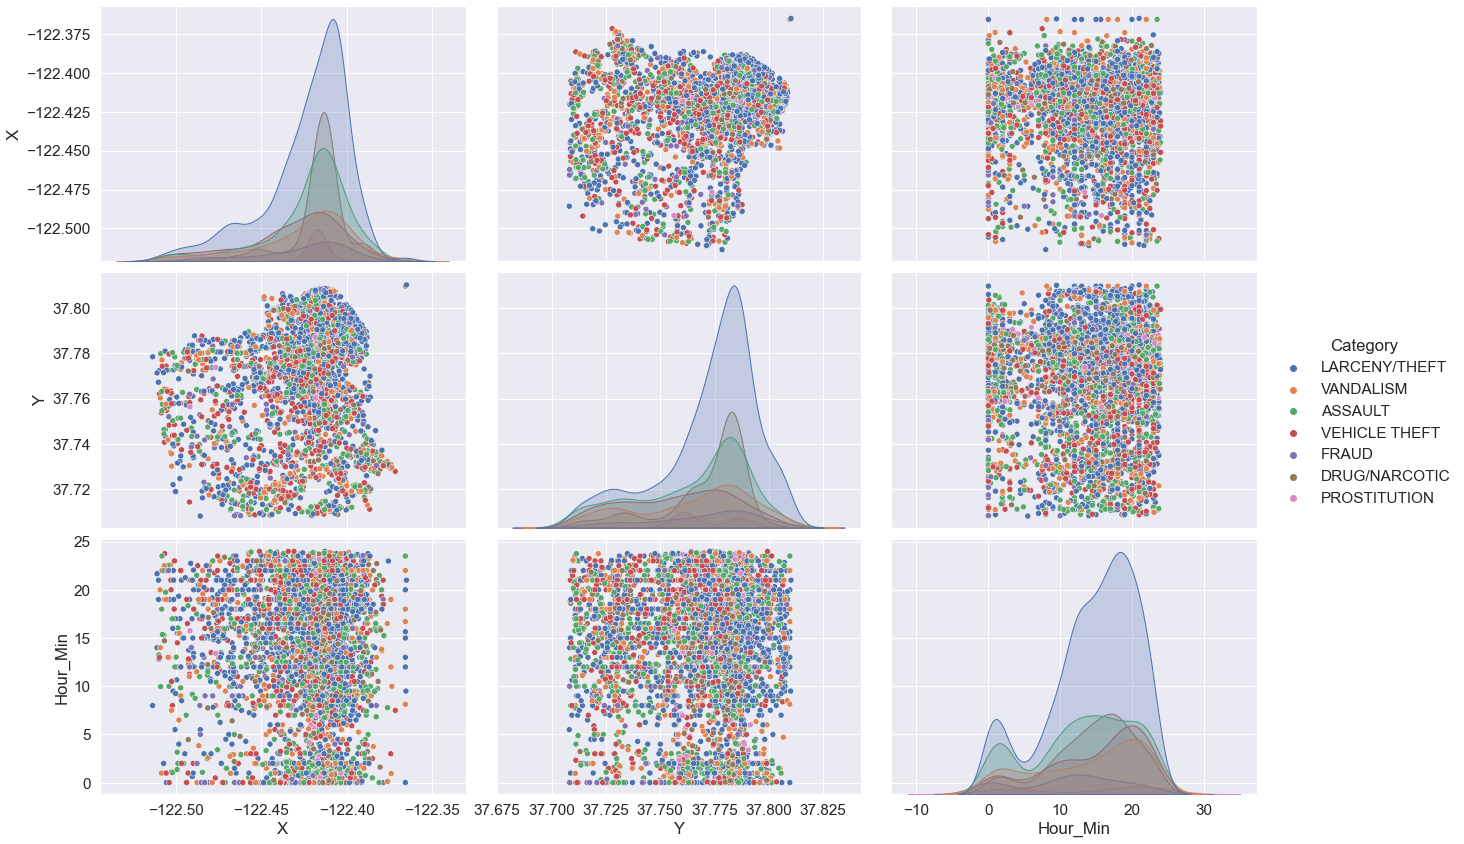

In [41]:
sns.pairplot(data = df_base_filtered[0::100], height=4, aspect=1.5, hue='Category')

In [6]:
# Extracting information from the streetnames
for i in df_base['Address'][0:10]:
    print(i)

OAK ST / LAGUNA ST
OAK ST / LAGUNA ST
VANNESS AV / GREENWICH ST
1500 Block of LOMBARD ST
100 Block of BRODERICK ST
0 Block of TEDDY AV
AVALON AV / PERU AV
KIRKWOOD AV / DONAHUE ST
600 Block of 47TH AV
JEFFERSON ST / LEAVENWORTH ST


# Step #3 Data Preprocessing

In [7]:
# Processing Function for Features
def cart2polar(x, y):
    dist = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    return dist, phi

def preprocessFeatures(dfx):
    
    # Time Feature Engineering
    df = pd.get_dummies(dfx[['DayOfWeek' , 'PdDistrict']])
    df['Hour_Min'] = pd.to_datetime(dfx['Dates']).dt.hour + pd.to_datetime(dfx['Dates']).dt.minute / 60
    # We add a feature that contains the expontential time
    df['Hour_Min_Exp'] = np.exp(df['Hour_Min'])
    
    df['Day'] = pd.to_datetime(dfx['Dates']).dt.day
    df['Month'] = pd.to_datetime(dfx['Dates']).dt.month
    df['Year'] = pd.to_datetime(dfx['Dates']).dt.year

    month_one_hot_encoded = pd.get_dummies(pd.to_datetime(dfx['Dates']).dt.month, prefix='Month')
    df = pd.concat([df, month_one_hot_encoded], axis=1, join="inner")
    
    # Convert Carthesian Coordinates to Polar Coordinates
    df[['X', 'Y']] = dfx[['X', 'Y']] # we maintain the original coordindates as additional features
    df['dist'], df['phi'] = cart2polar(dfx['X'], dfx['Y'])
  
    # Extracting Street Types
    df['Is_ST'] = dfx['Address'].str.contains(" ST", case=True)
    df['Is_AV'] = dfx['Address'].str.contains(" AV", case=True)
    df['Is_WY'] = dfx['Address'].str.contains(" WY", case=True)
    df['Is_TR'] = dfx['Address'].str.contains(" TR", case=True)
    df['Is_DR'] = dfx['Address'].str.contains(" DR", case=True)
    df['Is_Block'] = dfx['Address'].str.contains(" Block", case=True)
    df['Is_crossing'] = dfx['Address'].str.contains(" / ", case=True)
    
    return df

# Processing Function for Labels
def encodeLabels(dfx):
    df = pd.DataFrame (columns = [])
    factor = pd.factorize(dfx['Category'])
    return factor

# Remove Outliers by Longitude
df_cleaned = df_base[df_base['Y']<70]

# Encode Labels as Integer
factor = encodeLabels(df_cleaned)
y_df = factor[0]
labels = list(factor[1])
# for val, i in enumerate(labels):
#     print(val, i)

# Step #4 Visualize the Data on a Map

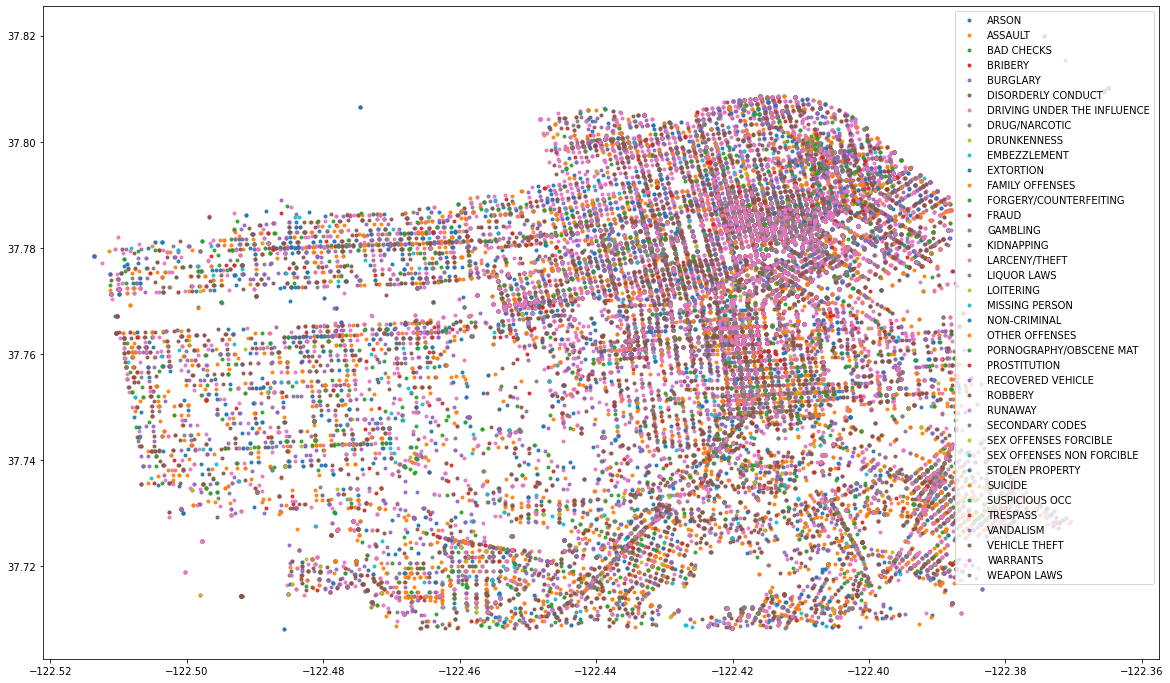

In [8]:
# 4.1 Plot Crime Types using a Scatter Plot
# Plot Criminal Activities by Lat and Long
df_filtered = df_cleaned.sample(frac=0.05)  
#df_filtered = df_cleaned[df_cleaned['Category'].isin(['PROSTITUTION', 'VEHICLE THEFT', 'FRAUD'])].sample(frac=0.05) # to filter 

groups = df_filtered.groupby('Category')

fig, ax = plt.subplots(sharex=False, figsize=(20, 12))
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group['X'], group['Y'], marker='.', linestyle='', label=name, alpha=0.9)
ax.legend()
plt.show()

In [76]:
# 4.2 Create a Crime Map of San Francisco using Plotly
# Limit the data to a fraction and selected categories
df_filtered = df_cleaned.sample(frac=0.01) 

fig = px.scatter_mapbox(df_filtered, lat="Y", lon="X", hover_name="Category", color='Category', hover_data=["Y", "X"], zoom=12, height=800)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

# Step #5 Split the Data

In [10]:
# Create train_df & test_df
x_df = preprocessFeatures(df_cleaned).copy()

# Split the data into x_train and y_train data sets
x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, train_size=0.7, random_state=0)
x_train.head()

DayOfWeek_Friday  DayOfWeek_Monday  DayOfWeek_Saturday  \
276998                 0                 0                   0   
81579                  0                 0                   0   
206676                 0                 0                   0   
732006                 0                 0                   0   
796194                 1                 0                   0   

        DayOfWeek_Sunday  DayOfWeek_Thursday  DayOfWeek_Tuesday  \
276998                 0                   0                  1   
81579                  0                   0                  1   
206676                 1                   0                  0   
732006                 0                   0                  0   
796194                 0                   0                  0   

        DayOfWeek_Wednesday  PdDistrict_BAYVIEW  PdDistrict_CENTRAL  \
276998                    0                   0                   0   
81579                     0                   0                   0   
206676                    0                   0                   0   
732006                    1                   0                   0   
796194                    0                   0                   0   

        PdDistrict_INGLESIDE  ...          Y        dist       phi  Is_ST  \
276998                     0  ...  37.785023  128.110900  2.842200   True   
81579                      0  ...  37.748470  128.185052  2.842677  False   
206676                     0  ...  37.762744  128.113657  2.842389   True   
732006                     0  ...  37.784140  128.109653  2.842204   True   
796194                     0  ...  37.791333  128.125982  2.842185   True   

        Is_AV  Is_WY  Is_TR  Is_DR  Is_Block  Is_crossing  
276998  False  False  False  False      True        False  
81579    True  False  False  False      True        False  
206676  False  False  False  False      True        False  
732006  False  False  False  False     False         True  
796194  False  False  False  False      True        False  

[5 rows x 45 columns]

# Step #6 Train a Random Decision Forest Classifier

In [42]:
# Train a single random forest classifier to establish a performance baseline - parameters are a best guess 
clf = RandomForestClassifier(max_depth=50, random_state=0, n_estimators = 100)
clf.fit(x_train, y_train.ravel())
y_pred = clf.predict(x_test)

# Create the Results Log
results_log = classification_report(y_test, y_pred)
print(results_log)

              precision    recall  f1-score   support

           0       0.15      0.10      0.12     12657
           1       0.29      0.35      0.32     37898
           2       0.38      0.63      0.47     52237
           3       0.46      0.40      0.43     16136
           4       0.16      0.08      0.10     13426
           5       0.25      0.21      0.23     27798
           6       0.10      0.04      0.06      6850
           7       0.23      0.22      0.23     23087
           8       0.19      0.12      0.15      2586
           9       0.20      0.13      0.15     10942
          10       0.08      0.03      0.05      9559
          11       0.00      0.00      0.00      1300
          12       0.20      0.10      0.14      3200
          13       0.37      0.43      0.40     16282
          14       0.02      0.02      0.02      1350
          15       0.01      0.00      0.00      2912
          16       0.05      0.03      0.04      2217
          17       0.61    

# Step #7 Train an XGBoost Classifier

In [12]:
# Configure the XGBoost model
param = {'booster': 'gbtree', 
         'tree_method': 'gpu_hist',
         'predictor': 'gpu_predictor',
         'max_depth': 70, 
         'eta': 0.15, 
         'objective': '{multi:softmax}', 
         'eval_metric': 'rmse', #e.g., rmse, rmsle, auc, mae, mlogloss
         'num_round': 100,
         'feature_selector ': 'greedy', #cyclic, greedy, shuffle, random, thrifty
         'sampling_method': 'gradient_based'
        }

xgb_clf = XGBClassifier(param)
xgb_clf.fit(x_train, y_train.ravel())
score = xgb_clf.score(x_test, y_test.ravel())
print(score)

# Create predictions on the test dataset
y_pred = xgb_clf.predict(x_test)

# Print a classification report
results_log = classification_report(y_test, y_pred)
print(results_log)

c:\Users\Flo\anaconda3\lib\site-packages\xgboost\core.py:525: FutureWarning: Pass `objective` as keyword args.  Passing these as positional arguments will be considered as error in future releases.
  warnings.warn(


0.30852142219859907
              precision    recall  f1-score   support

           0       0.17      0.01      0.02     12657
           1       0.30      0.42      0.35     37898
           2       0.33      0.72      0.46     52237
           3       0.31      0.27      0.29     16136
           4       0.21      0.03      0.05     13426
           5       0.24      0.18      0.21     27798
           6       0.17      0.01      0.01      6850
           7       0.21      0.19      0.20     23087
           8       0.26      0.01      0.02      2586
           9       0.22      0.08      0.12     10942
          10       0.13      0.00      0.00      9559
          11       0.07      0.00      0.01      1300
          12       0.20      0.08      0.11      3200
          13       0.34      0.43      0.38     16282
          14       0.00      0.00      0.00      1350
          15       0.12      0.00      0.01      2912
          16       0.15      0.02      0.03      2217
       

# Step #8 Visualize Model Performance

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

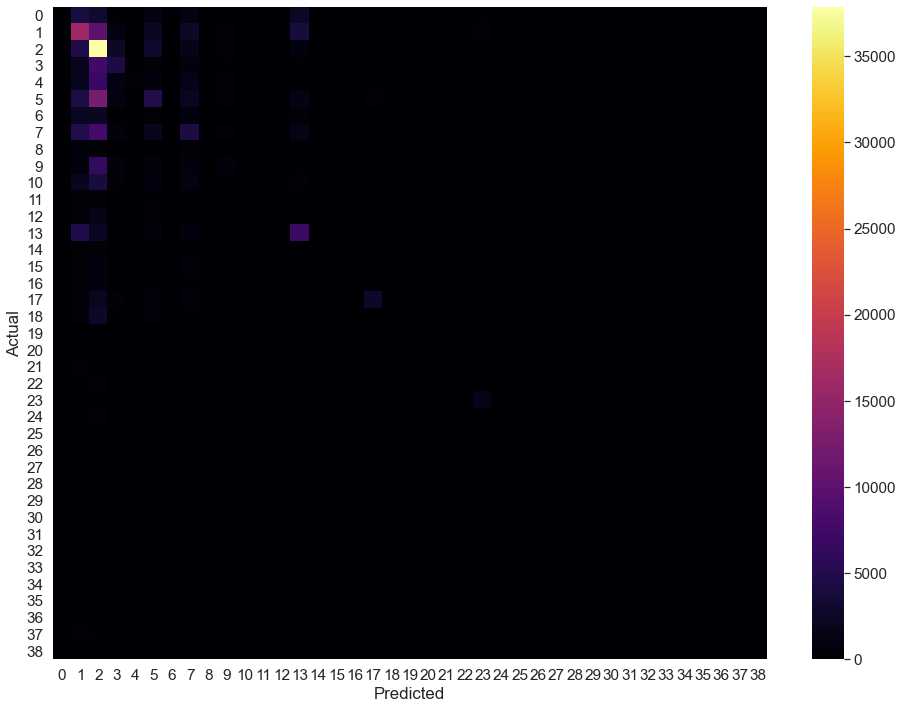

In [13]:
# Print a multi-Class Confusion Matrix
cnf_matrix = confusion_matrix(y_test.reshape(-1), y_pred)
df_cm = pd.DataFrame(cnf_matrix, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (16,12))
plt.tight_layout()
sns.set(font_scale=1.4) #for label size
sns.heatmap(df_cm, cbar=True, cmap= "inferno", annot=False, fmt='.0f' #, annot_kws={"size": 13}
           )